<a id='import_packages'></a>
# 1. Import Packages

In [1]:
# Importing Packages
import sys
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='load_data'></a>
# 2. Load Data

In [2]:
# Reading German Credit Data
raw_data = pd.read_csv("F:/mydata/German_Credit_data.csv")
raw_data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


<a id='data_preparation'></a>
# 3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [3]:
# Shape
raw_data.shape

(1000, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [4]:
# descriptive statistics
raw_data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


<a id='check_data_type'></a>
## 3.3 Checking Data Type and Missing Values 

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                                        1000 non-null int64
Status_of_existing_account                           1000 non-null int64
Duration_of_Credit_month                             1000 non-null int64
Payment_Status_of_Previous_Credit(Credit_history)    1000 non-null int64
Purpose_of_loan                                      1000 non-null int64
Credit_Amount                                        1000 non-null int64
Value_of_Savings_account&bonds                       1000 non-null int64
Years_of_Present_Employment                          1000 non-null int64
Percentage_of_disposable_income                      1000 non-null int64
Sex_&_Marital_Status                                 1000 non-null int64
Guarantors/Debtors                                   1000 non-null int64
Duration_in_Present_Residence                        1000 non-null int64
Property          

There are only 1000 rows in the raw_data data frame and there is no missing values

<a id='exploratory_data_analysis'></a>
# 4. Exploratory Data Analysis

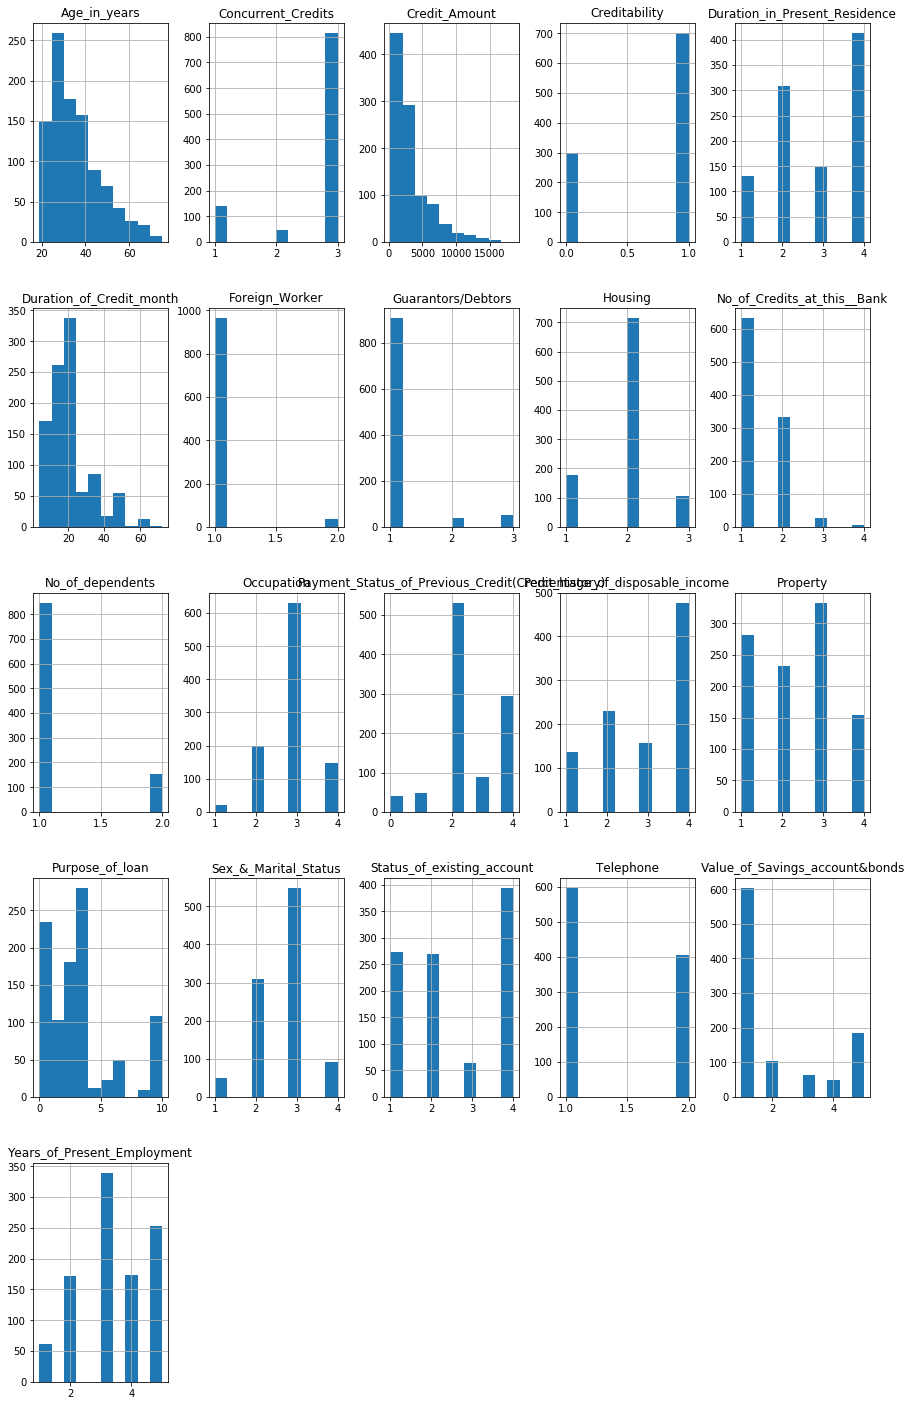

In [6]:
raw_data.hist(figsize=(15,25))
plt.show()

By visualizing the histogram of each variable, we can see "Age_in_years" and "Credit Amount" are not normally distributed. 

In [7]:
# To understand number of levels in each variables 
raw_data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

<a id='class_distribution'></a>
# 4.1 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [8]:
print(raw_data.groupby('Creditability').size())

Creditability
0    300
1    700
dtype: int64


In [9]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(raw_data['Creditability'])
percentage_labels = (raw_data['Creditability'].value_counts()/total_len)*100
percentage_labels

1    70.0
0    30.0
Name: Creditability, dtype: float64

<a id='Correlation'></a>
# 4.2 Correlation 

In [10]:
# Check Correlation
raw_data.corr()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,...,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Status_of_existing_account,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


Text(0.5,1,'Correlation between features')

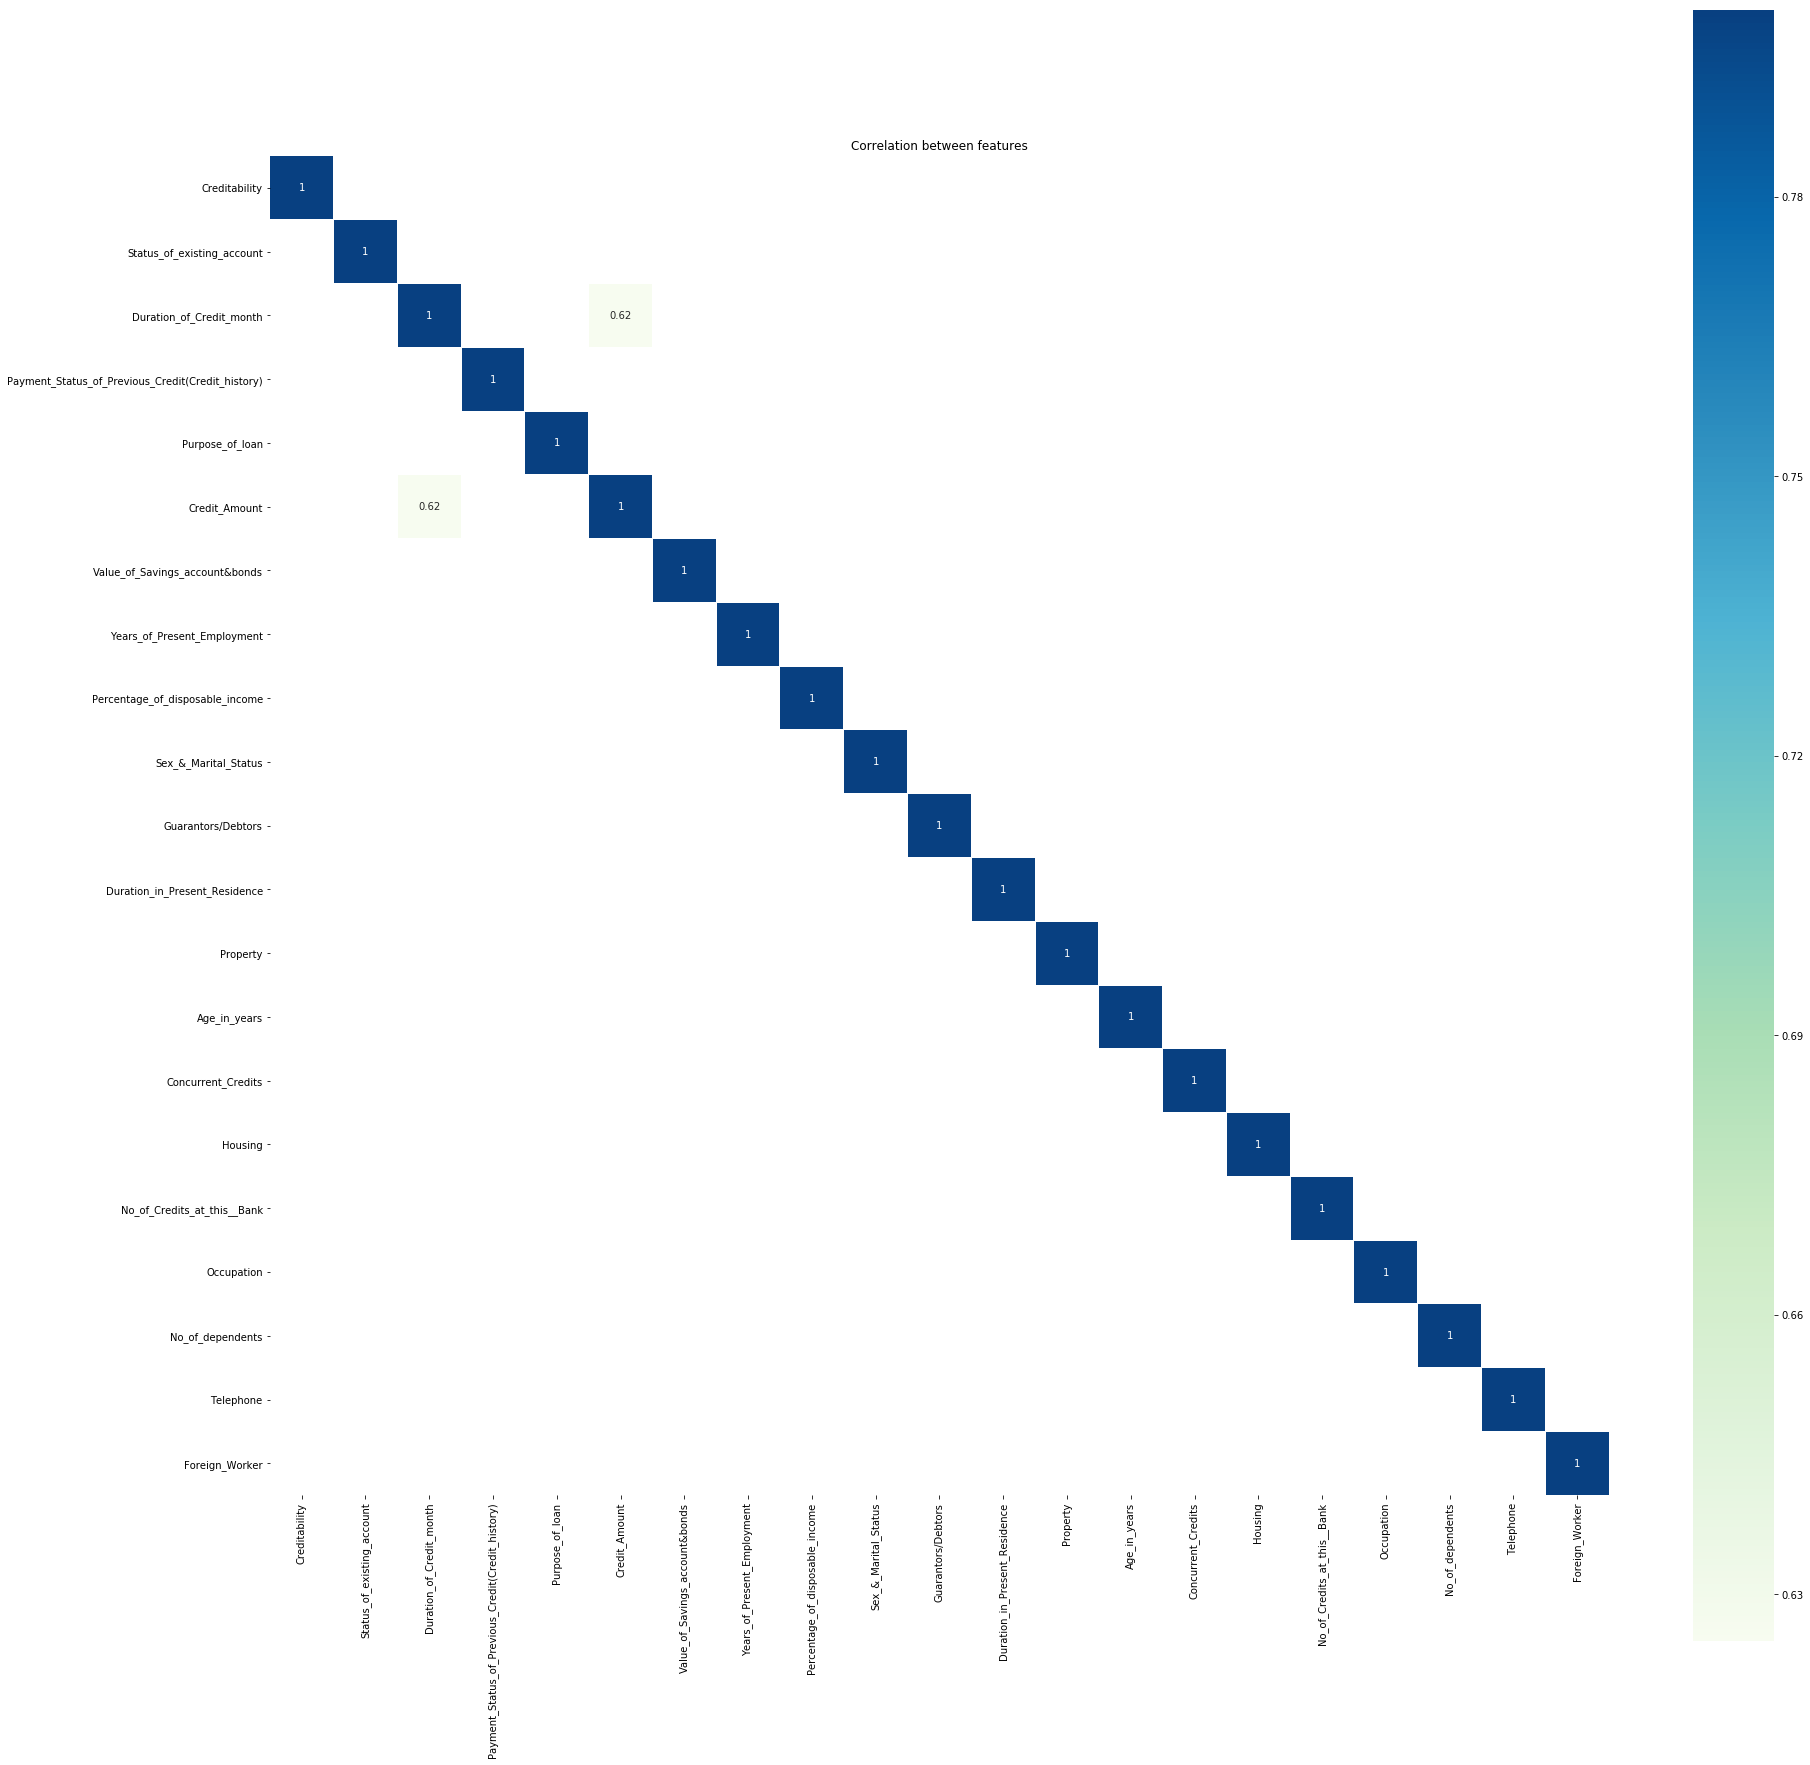

In [11]:
# Checking Correlation and correlation plot
import matplotlib.pyplot as plt
import seaborn as sns
corr=raw_data.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

As we can see "Credit_Amount" and "Duration_of_Credit_month" are highly correlated, we need to treat multicollinearity variables. 

<a id='modeling'></a>
# 5. Logistic Regression

<a id='prep_data'></a>
## 5.1 Preparation of Datasets

In [12]:
# Spliting Target Variable
predictor= raw_data.iloc[:, raw_data.columns != 'Creditability']
target= raw_data.iloc[:, raw_data.columns == 'Creditability']

In [13]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (700, 20)
x_test  (300, 20)
y_train  (700, 1)
y_test  (300, 1)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<a id='base_model'></a>
## 5.2 Building Logistic Regression Base Model

In [14]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(y_train,x_train)

# fit the model
model1 = logit.fit()

# Prining Logistic Regression model results 
model1.summary2()

Optimization terminated successfully.
         Current function value: 0.480402
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.197     
Dependent Variable:             Creditability              AIC:                        712.5629  
Date:                           2018-08-19 07:20           BIC:                        803.5845  
No. Observations:               700                        Log-Likelihood:             -336.28   
Df Model:                       19                         LL-Null:                    -418.79   
Df Residuals:                   680                        LLR p-value:                2.6772e-25
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 6.0000                                                           
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Status_of_existing_account                         0.4939   0.0816  6.0564 0.0000  0.3341  0.6538
Duration_of_Credit_month                          -0.0275   0.0104 -2.6356 0.0084 -0.0479 -0.0070
Payment_Status_of_Previous_Credit(Credit_history)  0.2585   0.1050  2.4622 0.0138  0.0527  0.4642
Purpose_of_loan                                    0.0277   0.0360  0.7702 0.4412 -0.0428  0.0982
Credit_Amount                                     -0.0001   0.0000 -1.3046 0.1920 -0.0002  0.0000
Value_of_Savings_account&bonds                     0.2057   0.0690  2.9831 0.0029  0.0706  0.3409
Years_of_Present_Employment                        0.2084   0.0887  2.3498 0.0188  0.0346  0.3822
Percentage_of_disposable_income                   -0.4662   0.1021 -4.5641 0.0000 -0.6664 -0.2660
Sex_&_Marital_Status                               0.1967   0.1430  1.3756 0.1689 -0.0836  0.4771
Guarantors/Debtors                                 0.0963   0.1984  0.4854 0.6274 -0.2926  0.4852
Duration_in_Present_Residence                     -0.1243   0.0928 -1.3395 0.1804 -0.3061  0.0576
Property                                          -0.2522   0.1095 -2.3023 0.0213 -0.4669 -0.0375
Age_in_years                                       0.0143   0.0105  1.3612 0.1734 -0.0063  0.0349
Concurrent_Credits                                 0.1034   0.1242  0.8330 0.4048 -0.1399  0.3468
Housing                                            0.0873   0.1999  0.4367 0.6623 -0.3045  0.4791
No_of_Credits_at_this__Bank                       -0.0578   0.1916 -0.3018 0.7628 -0.4333  0.3177
Occupation                                        -0.0092   0.1618 -0.0569 0.9546 -0.3262  0.3078
No_of_dependents                                  -0.4558   0.2679 -1.7010 0.0889 -0.9809  0.0694
Telephone                                          0.1890   0.2255  0.8382 0.4019 -0.2530  0.6310
Foreign_Worker                                    -0.0316   0.4583 -0.0691 0.9449 -0.9299  0.8666
=================================================================================================

"""

In [15]:
# Predict values using test data
y_pred = model1.predict(x_test)

In [16]:
# Making y_pred as DataFrame
predicted_df = pd.DataFrame(y_pred)
predicted_df.head(5)

,0
993,0.841483
859,0.489402
298,0.878734
553,0.945764
672,0.488180


In [17]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df['Predicted_Class'] = np.where(predicted_df[0]>= 0.50,1,0)
predicted_df.head(5)

,0,Predicted_Class
993,0.841483,1
859,0.489402,0
298,0.878734,1
553,0.945764,1
672,0.488180,0


# Model Accuracy
We will calculate the model accuracy on the test dataset using ‘score’ function.

In [18]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df['Predicted_Class']))

0.74


 We can see the accuracy of 74%

# Evaluate The Model

# Evaluate The Model

The Confusion matrix is used to describe the performance of classification model on a set of test dataset for which the true values are known. We will calculate the confusion matrix using ‘confusion_matrix’ function.



In [19]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df['Predicted_Class']).ravel()
confusion_matrix

array([ 37,  63,  15, 185], dtype=int64)

The results from the confusion matrix are telling us that 37 and 185 are the number of correct predictions. 63 and 15 are the number of incorrect predictions.
# Classification Report
This is another method to examine the performance of classification model.

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_df['Predicted_Class']))

             precision    recall  f1-score   support

          0       0.71      0.37      0.49       100
          1       0.75      0.93      0.83       200

avg / total       0.73      0.74      0.71       300



The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.

# ROC CURVE

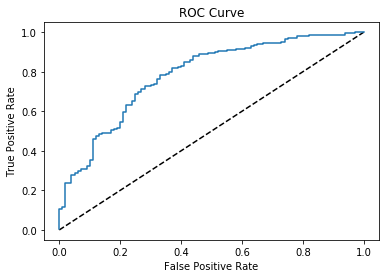

In [21]:
y_pred_prob = model1.predict(x_test)

from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [22]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df['Predicted_Class'])

0.64749999999999996

Area Under the Curve is 0.6475

## Cohen's Kappa
The Kappa statistic is a metric that compares an Observed Accuracy with an Expected Accuracy. The kappa statistic is used not only to evaluate a single classifier, but also to evaluate classifiers amongst themselves. In addition, it takes into account random chance, which generally means it is less misleading than simply using accuracy as a metric (an Observed Accuracy of 80% is a lot less impressive with an Expected Accuracy of 75% versus an Expected Accuracy of 50%). Computation of Observed Accuracy and Expected Accuracy is integral to comprehension of the kappa statistic, and is most easily illustrated through use of a confusion matrix.

In [23]:
cols = ['Model','R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " Logistic Regression Base Model",
                  'R-Squared Value': model1.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df['Predicted_Class']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df['Predicted_Class']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df['Predicted_Class'])})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression Base Model,0.197014,0.6475,0.745968,0.925,0.74,0.335227


<a id='removing_cre_amt'></a>
## 5.3. Removing "Credit Amount" variable and building a Logit model
Lets try to build a After removing "Credit_Amount" since its correlated with "Duration_of_Credit_month"

In [24]:
# Removing "Credit_Amount" column and using filter function we creating new train and test DataFrame
x_train1= x_train.filter(['Status_of_existing_account', 'Duration_of_Credit_month',
                        'Payment_Status_of_Previous_Credit(Credit_history)', 'Purpose_of_loan',
                        'Value_of_Savings_account&bonds',
                        'Years_of_Present_Employment', 'Percentage_of_disposable_income',
                        'Sex_&_Marital_Status', 'Guarantors/Debtors',
                        'Duration_in_Present_Residence', 'Property', 'Age_in_years',
                        'Concurrent_Credits', 'Housing', 'No_of_Credits_at_this__Bank',
                        'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker'])
x_test1= x_test.filter(['Status_of_existing_account', 'Duration_of_Credit_month',
                        'Payment_Status_of_Previous_Credit(Credit_history)', 'Purpose_of_loan',
                        'Value_of_Savings_account&bonds',
                        'Years_of_Present_Employment', 'Percentage_of_disposable_income',
                        'Sex_&_Marital_Status', 'Guarantors/Debtors',
                        'Duration_in_Present_Residence', 'Property', 'Age_in_years',
                        'Concurrent_Credits', 'Housing', 'No_of_Credits_at_this__Bank',
                        'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker'])
x_train1.shape, x_test1.shape

((700, 19), (300, 19))

In [25]:
#Build Logit Model
logit2 = sm.Logit(y_train,x_train1)

# fit the model
model2 = logit2.fit()

# Prining Logistic Regression model results 
model2.summary2()

Optimization terminated successfully.
         Current function value: 0.481612
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.195     
Dependent Variable:             Creditability              AIC:                        712.2562  
Date:                           2018-08-19 07:21           BIC:                        798.7267  
No. Observations:               700                        Log-Likelihood:             -337.13   
Df Model:                       18                         LL-Null:                    -418.79   
Df Residuals:                   681                        LLR p-value:                1.8620e-25
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 6.0000                                                           
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Status_of_existing_account                         0.4941   0.0814  6.0725 0.0000  0.3346  0.6536
Duration_of_Credit_month                          -0.0358   0.0083 -4.3159 0.0000 -0.0521 -0.0195
Payment_Status_of_Previous_Credit(Credit_history)  0.2658   0.1046  2.5422 0.0110  0.0609  0.4708
Purpose_of_loan                                    0.0278   0.0358  0.7765 0.4375 -0.0423  0.0979
Value_of_Savings_account&bonds                     0.2028   0.0690  2.9399 0.0033  0.0676  0.3380
Years_of_Present_Employment                        0.2112   0.0883  2.3925 0.0167  0.0382  0.3842
Percentage_of_disposable_income                   -0.4119   0.0925 -4.4544 0.0000 -0.5931 -0.2306
Sex_&_Marital_Status                               0.1930   0.1421  1.3574 0.1746 -0.0856  0.4716
Guarantors/Debtors                                 0.0958   0.1983  0.4832 0.6290 -0.2929  0.4845
Duration_in_Present_Residence                     -0.1203   0.0926 -1.3000 0.1936 -0.3018  0.0611
Property                                          -0.2548   0.1093 -2.3308 0.0198 -0.4690 -0.0405
Age_in_years                                       0.0138   0.0105  1.3111 0.1898 -0.0068  0.0343
Concurrent_Credits                                 0.1134   0.1240  0.9144 0.3605 -0.1297  0.3564
Housing                                            0.0856   0.1996  0.4287 0.6681 -0.3057  0.4769
No_of_Credits_at_this__Bank                       -0.0762   0.1909 -0.3989 0.6899 -0.4503  0.2980
Occupation                                        -0.0463   0.1595 -0.2901 0.7718 -0.3589  0.2664
No_of_dependents                                  -0.4434   0.2682 -1.6529 0.0984 -0.9691  0.0824
Telephone                                          0.1373   0.2210  0.6213 0.5344 -0.2959  0.5706
Foreign_Worker                                    -0.0518   0.4570 -0.1135 0.9097 -0.9475  0.8438
=================================================================================================

"""

In [26]:
# Predict values using test data
y_pred2 = model2.predict(x_test1)

In [27]:
# Making y_pred as DataFrame
predicted_df2 = pd.DataFrame(y_pred2)
predicted_df2.head(5)

,0
993,0.827863
859,0.480910
298,0.866885
553,0.943799
672,0.496007


In [28]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df2['Predicted_Class'] = np.where(predicted_df2[0]>= 0.50,1,0)
predicted_df2.tail(5)

,0,Predicted_Class
167,0.962955,1
998,0.864725,1
984,0.764521,1
491,0.960359,1
10,0.765681,1


In [29]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df2['Predicted_Class']))

0.743333333333


In [30]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df2['Predicted_Class']).ravel()
confusion_matrix

array([ 39,  61,  16, 184], dtype=int64)

The results from the confusion matrix are telling us that 39 and 184 are the number of correct predictions. 61 and 16 are the number of incorrect predictions.

In [31]:
print(classification_report(y_test, predicted_df2['Predicted_Class']))

             precision    recall  f1-score   support

          0       0.71      0.39      0.50       100
          1       0.75      0.92      0.83       200

avg / total       0.74      0.74      0.72       300



The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.

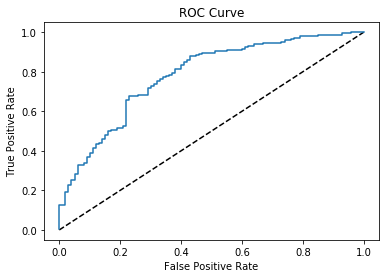

In [32]:
# ROC Curve

y_pred_prob = model2.predict(x_test1)
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df2['Predicted_Class'])

0.65500000000000003

In [34]:
cols = ['Model','R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp2 = pd.Series({'Model': " LR after removing Credit_amount",
                  'R-Squared Value': model2.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df2['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df2['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df2['Predicted_Class']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df2['Predicted_Class']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df2['Predicted_Class'])})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,LR after removing Credit_amount,0.194992,0.655,0.75102,0.92,0.743333,0.349296


<a id='credit_month'></a>
## 5.4. Removing "Duration_of_Credit_month" variable and building a Logit model
Lets try to build a After removing "Duration_of_Credit_month" to see the difference in two model

In [35]:
# Removing "Duration_of_Credit_month" column and using filter function we creating new train and test DataFrame
x_train2= x_train.filter(['Status_of_existing_account',
                        'Payment_Status_of_Previous_Credit(Credit_history)', 'Purpose_of_loan',
                        'Credit_Amount', 'Value_of_Savings_account&bonds',
                        'Years_of_Present_Employment', 'Percentage_of_disposable_income',
                        'Sex_&_Marital_Status', 'Guarantors/Debtors',
                        'Duration_in_Present_Residence', 'Property', 'Age_in_years',
                        'Concurrent_Credits', 'Housing', 'No_of_Credits_at_this__Bank',
                        'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker'])

x_test2= x_test.filter(['Status_of_existing_account',
                        'Payment_Status_of_Previous_Credit(Credit_history)', 'Purpose_of_loan',
                        'Credit_Amount', 'Value_of_Savings_account&bonds',
                        'Years_of_Present_Employment', 'Percentage_of_disposable_income',
                        'Sex_&_Marital_Status', 'Guarantors/Debtors',
                        'Duration_in_Present_Residence', 'Property', 'Age_in_years',
                        'Concurrent_Credits', 'Housing', 'No_of_Credits_at_this__Bank',
                        'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker'])
x_train2.shape, x_test2.shape

((700, 19), (300, 19))

In [36]:
#Build Logit Model
logit3 = sm.Logit(y_train,x_train2)

# fit the model
model3 = logit3.fit()

# Prining Logistic Regression model results 
model3.summary2()

Optimization terminated successfully.
         Current function value: 0.485443
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.189     
Dependent Variable:             Creditability              AIC:                        717.6196  
Date:                           2018-08-19 07:21           BIC:                        804.0901  
No. Observations:               700                        Log-Likelihood:             -339.81   
Df Model:                       18                         LL-Null:                    -418.79   
Df Residuals:                   681                        LLR p-value:                2.0902e-24
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 6.0000                                                           
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Status_of_existing_account                         0.5001   0.0812  6.1573 0.0000  0.3409  0.6593
Payment_Status_of_Previous_Credit(Credit_history)  0.2678   0.1048  2.5559 0.0106  0.0624  0.4732
Purpose_of_loan                                    0.0137   0.0353  0.3872 0.6986 -0.0555  0.0829
Credit_Amount                                     -0.0001   0.0000 -3.6453 0.0003 -0.0002 -0.0001
Value_of_Savings_account&bonds                     0.1976   0.0683  2.8915 0.0038  0.0637  0.3315
Years_of_Present_Employment                        0.1983   0.0880  2.2521 0.0243  0.0257  0.3708
Percentage_of_disposable_income                   -0.5266   0.0996 -5.2853 0.0000 -0.7219 -0.3313
Sex_&_Marital_Status                               0.1887   0.1426  1.3234 0.1857 -0.0908  0.4681
Guarantors/Debtors                                 0.0717   0.1954  0.3670 0.7136 -0.3113  0.4547
Duration_in_Present_Residence                     -0.1268   0.0926 -1.3688 0.1711 -0.3083  0.0547
Property                                          -0.2976   0.1080 -2.7550 0.0059 -0.5094 -0.0859
Age_in_years                                       0.0167   0.0104  1.6029 0.1090 -0.0037  0.0371
Concurrent_Credits                                 0.0756   0.1231  0.6143 0.5390 -0.1656  0.3168
Housing                                            0.0534   0.1983  0.2692 0.7878 -0.3352  0.4419
No_of_Credits_at_this__Bank                       -0.0288   0.1907 -0.1511 0.8799 -0.4025  0.3449
Occupation                                        -0.0069   0.1597 -0.0430 0.9657 -0.3199  0.3062
No_of_dependents                                  -0.4658   0.2654 -1.7549 0.0793 -0.9860  0.0544
Telephone                                          0.2149   0.2243  0.9581 0.3380 -0.2247  0.6544
Foreign_Worker                                     0.0049   0.4532  0.0109 0.9913 -0.8834  0.8932
=================================================================================================

"""

In [37]:
# Predict values using test data
y_pred3 = model3.predict(x_test2)

In [38]:
# Making y_pred as DataFrame
predicted_df3 = pd.DataFrame(y_pred3)
predicted_df3.head(5)

,0
993,0.868776
859,0.433240
298,0.885488
553,0.930537
672,0.478826


In [39]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df3['Predicted_Class'] = np.where(predicted_df3[0]>= 0.50,1,0)
predicted_df3.head(5)

,0,Predicted_Class
993,0.868776,1
859,0.433240,0
298,0.885488,1
553,0.930537,1
672,0.478826,0


# Evaluate The Model
## Confusion Matrix
The Confusion matrix is used to describe the performance of classification model on a set of test dataset for which the true values are known. We will calculate the confusion matrix using ‘confusion_matrix’ function.

In [40]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df3['Predicted_Class']).ravel()
confusion_matrix

array([ 38,  62,  14, 186], dtype=int64)

The results from the confusion matrix are telling us that 38 and 186 are the number of correct predictions. 62 and 14 are the number of incorrect predictions.

# Classification Report
This is another method to examine the performance of classification model.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_df3['Predicted_Class']))

             precision    recall  f1-score   support

          0       0.73      0.38      0.50       100
          1       0.75      0.93      0.83       200

avg / total       0.74      0.75      0.72       300



The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.

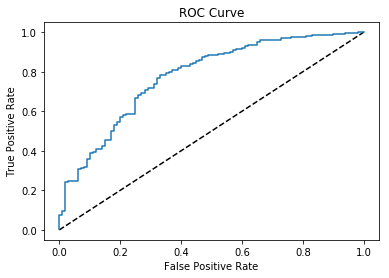

In [42]:
#Predicting proba
y_pred_prob = model3.predict(x_test2)
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
cols = ['Model', 'R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp3 = pd.Series({'Model': " LR after removing Duration of Credit",
                  'R-Squared Value': model3.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df3['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df3['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df3['Predicted_Class']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df3['Predicted_Class']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df3['Predicted_Class'])})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,LR after removing Duration of Credit,0.188589,0.655,0.75,0.93,0.746667,0.352273


In [44]:
# Comparison of Logistic Regression modeles after removing "Credit_amount" and "Duration of Credit"
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model_LR = pd.DataFrame(columns = cols)
model_LR = model_LR.append([model1_report,model2_report,model3_report],ignore_index= True)
model_LR

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Accuracy Score,Kappa Score,Model,Precision Score,R-Squared Value,ROC Score,Recall Score
0,0.740000,0.335227,Logistic Regression Base Model,0.745968,0.197014,0.6475,0.925
1,0.743333,0.349296,LR after removing Credit_amount,0.751020,0.194992,0.6550,0.920
2,0.746667,0.352273,LR after removing Duration of Credit,0.750000,0.188589,0.6550,0.930


After Comparing Duration of Credit from both train and test the ROC Score and Model performance has improved
<a id='treat_multicol'></a>
## 5.5. Treating Multicollinearity and Building Logit Model 

In [45]:
# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
Status_of_existing_account 5.517
Payment_Status_of_Previous_Credit(Credit_history) 9.777
Purpose_of_loan 2.102
Credit_Amount 3.059
Value_of_Savings_account&bonds 2.973
Years_of_Present_Employment 11.115
Percentage_of_disposable_income 9.411
Sex_&_Marital_Status 17.217
Guarantors/Debtors 6.764
Duration_in_Present_Residence 8.804
Property 8.375
Age_in_years 15.04
Concurrent_Credits 14.37
Housing 18.895
No_of_Credits_at_this__Bank 9.646
Occupation 25.373
No_of_dependents 11.424
Telephone 11.765
Foreign_Worker 23.613


In [46]:
# Removing variables having more the 10 VIF values
VIF_10 = ['Foreign_Worker','Occupation','Concurrent_Credits','Age_in_years','Sex_&_Marital_Status','Telephone',
         'No_of_dependents','Housing','Years_of_Present_Employment']
to_keep = [x for x in x_train2 if x not in VIF_10]

x_train_vif = x_train2[to_keep]
print(x_train_vif.shape)

to_keep = [x for x in x_test2 if x not in VIF_10]

x_test_vif = x_test2[to_keep]
print(x_test_vif.shape)

(700, 10)
(300, 10)


In [47]:
#Build Logit Model
logit4 = sm.Logit(y_train,x_train_vif)

# fit the model
model4 = logit4.fit()

# Prining Logistic Regression model results 
model4.summary2()

Optimization terminated successfully.
         Current function value: 0.498449
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.167     
Dependent Variable:             Creditability              AIC:                        717.8284  
Date:                           2018-08-19 07:21           BIC:                        763.3392  
No. Observations:               700                        Log-Likelihood:             -348.91   
Df Model:                       9                          LL-Null:                    -418.79   
Df Residuals:                   690                        LLR p-value:                1.1623e-25
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 6.0000                                                           
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Status_of_existing_account                         0.5519   0.0780  7.0757 0.0000  0.3990  0.7048
Payment_Status_of_Previous_Credit(Credit_history)  0.3621   0.0982  3.6879 0.0002  0.1697  0.5545
Purpose_of_loan                                    0.0237   0.0347  0.6843 0.4938 -0.0443  0.0918
Credit_Amount                                     -0.0001   0.0000 -3.1864 0.0014 -0.0002 -0.0000
Value_of_Savings_account&bonds                     0.2245   0.0671  3.3471 0.0008  0.0931  0.3560
Percentage_of_disposable_income                   -0.3852   0.0830 -4.6392 0.0000 -0.5479 -0.2224
Guarantors/Debtors                                 0.2380   0.1726  1.3790 0.1679 -0.1003  0.5763
Duration_in_Present_Residence                     -0.0077   0.0827 -0.0934 0.9256 -0.1697  0.1543
Property                                          -0.2089   0.0923 -2.2631 0.0236 -0.3898 -0.0280
No_of_Credits_at_this__Bank                        0.0149   0.1804  0.0823 0.9344 -0.3387  0.3684
=================================================================================================

"""

In [48]:
# Predict values using test data
y_pred4 = model4.predict(x_test_vif)

In [49]:
# Making y_pred as DataFrame
predicted_df4 = pd.DataFrame(y_pred4)
predicted_df4.head(5)

,0
993,0.811534
859,0.394681
298,0.908611
553,0.918366
672,0.721851


In [50]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df4['Predicted_Class'] = np.where(predicted_df4[0]>= 0.50,1,0)
predicted_df4.head(5)

,0,Predicted_Class
993,0.811534,1
859,0.394681,0
298,0.908611,1
553,0.918366,1
672,0.721851,1


In [51]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df4['Predicted_Class']))

0.756666666667


In [52]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df4['Predicted_Class'])

0.66749999999999998

In [53]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df4['Predicted_Class']).ravel()
confusion_matrix

array([ 40,  60,  13, 187], dtype=int64)

The results from the confusion matrix are telling us that 40 and 187 are the number of correct predictions. 60 and 13 are the number of incorrect predictions.

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_df4['Predicted_Class']))

             precision    recall  f1-score   support

          0       0.75      0.40      0.52       100
          1       0.76      0.94      0.84       200

avg / total       0.76      0.76      0.73       300



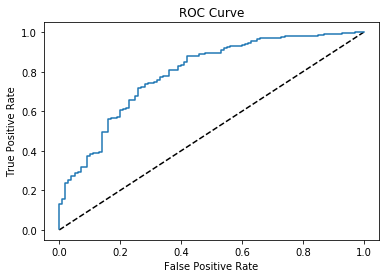

In [55]:
#Predicting proba
y_pred_prob = model4.predict(x_test_vif)
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [56]:
cols = ['Model', 'R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp4 = pd.Series({'Model': " LR after Treating Multicollinearity",
                  'R-Squared Value': model4.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df4['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df4['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df4['Predicted_Class']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df4['Predicted_Class']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df4['Predicted_Class'])})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,LR after Treating Multicollinearity,0.166849,0.6675,0.757085,0.935,0.756667,0.379603


<a id='remove_insig_var'></a>
# 5.6 Removing Insignificant Variable

In [57]:
X = x_train_vif
Y = y_train
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  Status_of_existing_account     with p-value 6.87132e-19
Add  Payment_Status_of_Previous_Credit(Credit_history) with p-value 1.28979e-05
Add  Property                       with p-value 0.000843356
Add  Percentage_of_disposable_income with p-value 0.00138673
Add  Value_of_Savings_account&bonds with p-value 0.00219642
Add  Credit_Amount                  with p-value 0.00161204
resulting features:
['Status_of_existing_account', 'Payment_Status_of_Previous_Credit(Credit_history)', 'Property', 'Percentage_of_disposable_income', 'Value_of_Savings_account&bonds', 'Credit_Amount']


In [58]:
# Creating new train and test dataframe after removing insignificant variable
df_train= x_train.filter(['Status_of_existing_account', 'Payment_Status_of_Previous_Credit(Credit_history)', 'Property', 'Percentage_of_disposable_income', 'Value_of_Savings_account&bonds', 'Credit_Amount'])
df_test= x_test.filter(['Status_of_existing_account', 'Payment_Status_of_Previous_Credit(Credit_history)', 'Property', 'Percentage_of_disposable_income', 'Value_of_Savings_account&bonds', 'Credit_Amount'])
df_train.shape, df_test.shape

((700, 6), (300, 6))

In [59]:
#Build Logit Model
logit5 = sm.Logit(y_train,df_train)

# fit the model
model5 = logit5.fit()

Optimization terminated successfully.
         Current function value: 0.500455
         Iterations 6


In [60]:
# Prining Logistic Regression model results 
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
=================================================================================================
Model:                          Logit                      Pseudo R-squared:           0.163     
Dependent Variable:             Creditability              AIC:                        712.6369  
Date:                           2018-08-19 07:22           BIC:                        739.9434  
No. Observations:               700                        Log-Likelihood:             -350.32   
Df Model:                       5                          LL-Null:                    -418.79   
Df Residuals:                   694                        LLR p-value:                7.9955e-28
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 6.0000                                                           
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Status_of_existing_account                         0.5657   0.0771  7.3325 0.0000  0.4145  0.7168
Payment_Status_of_Previous_Credit(Credit_history)  0.3870   0.0826  4.6856 0.0000  0.2251  0.5488
Property                                          -0.1990   0.0870 -2.2865 0.0222 -0.3696 -0.0284
Percentage_of_disposable_income                   -0.3317   0.0737 -4.4987 0.0000 -0.4762 -0.1872
Value_of_Savings_account&bonds                     0.2245   0.0665  3.3776 0.0007  0.0942  0.3548
Credit_Amount                                     -0.0001   0.0000 -2.8754 0.0040 -0.0002 -0.0000
=================================================================================================

"""

In [61]:
# Predict values using test data
y_pred5 = model5.predict(df_test)

In [62]:
# Making y_pred as DataFrame
predicted_df5= pd.DataFrame(y_pred5)
predicted_df5.head(5)

,0
993,0.808091
859,0.400824
298,0.898530
553,0.913011
672,0.622498


In [63]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df5['Predicted_Class'] = np.where(predicted_df5[0]>= 0.50,1,0)
predicted_df5.head(5)

,0,Predicted_Class
993,0.808091,1
859,0.400824,0
298,0.898530,1
553,0.913011,1
672,0.622498,1


In [64]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df5['Predicted_Class']))

0.766666666667


In [65]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df5['Predicted_Class'])

0.67999999999999994

In [66]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df5['Predicted_Class']).ravel()
confusion_matrix

array([ 42,  58,  12, 188], dtype=int64)

The results from the confusion matrix are telling us that 42 and 188 are the number of correct predictions. 58 and 12 are the number of incorrect predictions.

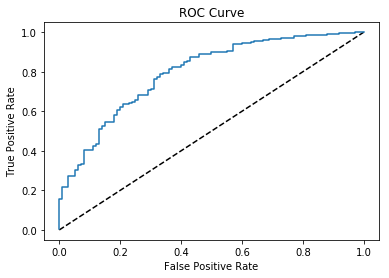

In [67]:
#Predicting proba
y_pred_prob = model5.predict(df_test)
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [68]:
cols = ['Model','R-Squared Value', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp5 = pd.Series({'Model': " LR after Removing Insignificant Variable",
                  'R-Squared Value': model5.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df5['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df5['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df5['Predicted_Class']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df5['Predicted_Class']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df5['Predicted_Class'])})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,LR after Removing Insignificant Variable,0.163496,0.68,0.764228,0.94,0.766667,0.40678


In [69]:
# Comparison of various model
cols = ['Model','R-Squared Value', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model2_report,model3_report,model4_report,model5_report], ignore_index = True)
clas_model

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression Base Model,0.197014,0.6475,0.745968,0.925,0.740000,0.335227
1,LR after removing Credit_amount,0.194992,0.6550,0.751020,0.920,0.743333,0.349296
2,LR after removing Duration of Credit,0.188589,0.6550,0.750000,0.930,0.746667,0.352273
3,LR after Treating Multicollinearity,0.166849,0.6675,0.757085,0.935,0.756667,0.379603
4,LR after Removing Insignificant Variable,0.163496,0.6800,0.764228,0.940,0.766667,0.406780


As we can see in the table with the comparision of various models, Out of all the models that After removing Insignificant Variables we get the best accuracy of 76% and ROC Score of 68.